# TODO: Title

This notebook lists all the steps that you need to complete the complete this project. You will need to complete all the TODOs in this notebook as well as in the README and the two python scripts included with the starter code.


**TODO**: Give a helpful introduction to what this notebook is for. Remember that comments, explanations and good documentation make your project informative and professional.

**Note:** This notebook has a bunch of code and markdown cells with TODOs that you have to complete. These are meant to be helpful guidelines for you to finish your project while meeting the requirements in the project rubrics. Feel free to change the order of these the TODO's and use more than one TODO code cell to do all your tasks.

In [1]:
!pip install --upgrade sagemaker 

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 49.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.2/139.2 kB 23.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 78.4 MB/s eta 0:00:00:00:010:01
  Attempting uninstall: botocore
    Found existing installation: botocore 1.34.131
    Uninstalling botocore-1.34.131:
      Successfully uninstalled botocore-1.34.131
  Attempting uninstall: boto3
    Found existing installation: boto3 1.34.131
    Uninstalling boto3-1.34.131:
      Successfully uninstalled boto3-1.34.131
  Attempting uninstall: sagemaker
    Found existing installation: sagemaker 2.224.1
    Uninstalling sagemaker-2.224.1:
      Successfully uninstalled sagemaker-2.224.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
aiobotocore 2.13.1 requires botocore<1.34.132,>=1.34.70, but you have botocore 1.3

In [20]:
# TODO: Install any packages that you might need
# For instance, you will need the smdebug package
!pip install smdebug

  Using cached smdebug-1.0.34-py2.py3-none-any.whl.metadata (1.8 kB)
  Using cached protobuf-3.20.3-cp310-cp310-manylinux_2_12_x86_64.manylinux2010_x86_64.whl.metadata (679 bytes)
  Using cached pyinstrument-3.4.2-py2.py3-none-any.whl.metadata (22 kB)
  Using cached pyinstrument_cext-0.2.4-cp310-cp310-linux_x86_64.whl
Using cached smdebug-1.0.34-py2.py3-none-any.whl (280 kB)
Using cached pyinstrument-3.4.2-py2.py3-none-any.whl (83 kB)
Using cached protobuf-3.20.3-cp310-cp310-manylinux_2_12_x86_64.manylinux2010_x86_64.whl (1.1 MB)
  Attempting uninstall: protobuf
    Found existing installation: protobuf 4.24.4
    Uninstalling protobuf-4.24.4:
      Successfully uninstalled protobuf-4.24.4


In [1]:
# TODO: Import any packages that you might need
# For instance you will need Boto3 and Sagemaker
import sagemaker
import boto3

sagemaker.config INFO - Not applying SDK defaults from location: /etc/xdg/sagemaker/config.yaml
sagemaker.config INFO - Not applying SDK defaults from location: /home/sagemaker-user/.config/sagemaker/config.yaml


## Dataset
TODO: Explain what dataset you are using for this project. Maybe even give a small overview of the classes, class distributions etc that can help anyone not familiar with the dataset get a better understand of it.

In [1]:
#TODO: Fetch and upload the data to AWS S3

# Command to download and unzip data
!wget wget https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/dogImages.zip --no-check-certificate
!unzip dogImages.zip

Archive:  dogImages.zip
   creating: dogImages/
   creating: dogImages/test/
   creating: dogImages/train/
   creating: dogImages/valid/
   creating: dogImages/test/001.Affenpinscher/
  inflating: dogImages/test/001.Affenpinscher/Affenpinscher_00003.jpg  
  inflating: dogImages/test/001.Affenpinscher/Affenpinscher_00023.jpg  
  inflating: dogImages/test/001.Affenpinscher/Affenpinscher_00036.jpg  
  inflating: dogImages/test/001.Affenpinscher/Affenpinscher_00047.jpg  
  inflating: dogImages/test/001.Affenpinscher/Affenpinscher_00048.jpg  
  inflating: dogImages/test/001.Affenpinscher/Affenpinscher_00058.jpg  
  inflating: dogImages/test/001.Affenpinscher/Affenpinscher_00071.jpg  
  inflating: dogImages/test/001.Affenpinscher/Affenpinscher_00078.jpg  
   creating: dogImages/test/002.Afghan_hound/
  inflating: dogImages/test/002.Afghan_hound/Afghan_hound_00116.jpg  
  inflating: dogImages/test/002.Afghan_hound/Afghan_hound_00125.jpg  
  inflating: dogImages/test/002.Afghan_hound/Afghan_ho

In [2]:
import sagemaker

sess = sagemaker.Session()
bucket = sess.default_bucket()
print("Default Bucket: {}".format(bucket))

region = "us-east-1"
print("AWS Region: {}".format(region))

role = sagemaker.get_execution_role() ## TODO: fill in
print("RoleArn: {}".format(role))

sagemaker.config INFO - Not applying SDK defaults from location: /etc/xdg/sagemaker/config.yaml
sagemaker.config INFO - Not applying SDK defaults from location: /home/sagemaker-user/.config/sagemaker/config.yaml
Default Bucket: sagemaker-us-east-1-471112614246
AWS Region: us-east-1
RoleArn: arn:aws:iam::471112614246:role/service-role/AmazonSageMaker-ExecutionRole-20240704T225789


In [5]:
import os

os.environ["DEFAULT_S3_BUCKET"] = bucket
!aws s3 sync ./dogImages/train s3://${DEFAULT_S3_BUCKET}/course4-data/train/
!aws s3 sync ./dogImages/test s3://${DEFAULT_S3_BUCKET}/course4-data/test/
!aws s3 sync ./dogImages/valid s3://${DEFAULT_S3_BUCKET}/course4-data/valid/


upload: dogImages/train/001.Affenpinscher/Affenpinscher_00002.jpg to s3://sagemaker-us-east-1-471112614246/course4-data/train/001.Affenpinscher/Affenpinscher_00002.jpg
upload: dogImages/train/001.Affenpinscher/Affenpinscher_00010.jpg to s3://sagemaker-us-east-1-471112614246/course4-data/train/001.Affenpinscher/Affenpinscher_00010.jpg
upload: dogImages/train/001.Affenpinscher/Affenpinscher_00006.jpg to s3://sagemaker-us-east-1-471112614246/course4-data/train/001.Affenpinscher/Affenpinscher_00006.jpg
upload: dogImages/train/001.Affenpinscher/Affenpinscher_00004.jpg to s3://sagemaker-us-east-1-471112614246/course4-data/train/001.Affenpinscher/Affenpinscher_00004.jpg
upload: dogImages/train/001.Affenpinscher/Affenpinscher_00001.jpg to s3://sagemaker-us-east-1-471112614246/course4-data/train/001.Affenpinscher/Affenpinscher_00001.jpg
upload: dogImages/train/001.Affenpinscher/Affenpinscher_00005.jpg to s3://sagemaker-us-east-1-471112614246/course4-data/train/001.Affenpinscher/Affenpinscher_00

## Hyperparameter Tuning
**TODO:** This is the part where you will finetune a pretrained model with hyperparameter tuning. Remember that you have to tune a minimum of two hyperparameters. However you are encouraged to tune more. You are also encouraged to explain why you chose to tune those particular hyperparameters and the ranges.

**Note:** You will need to use the `hpo.py` script to perform hyperparameter tuning.

In [3]:
#TODO: Declare your HP ranges, metrics etc.
import sagemaker
from sagemaker.tuner import (
    IntegerParameter,
    CategoricalParameter,
    ContinuousParameter,
    HyperparameterTuner,
)
hyperparameter_ranges = {
    "lr": ContinuousParameter(0.001, 0.1),
    "batch-size": CategoricalParameter([4, 8, 16]),
}

In [48]:
objective_metric_name = "average test loss"
objective_type = "Minimize"
metric_definitions = [{"Name": "average test loss", "Regex": "Test set: Average loss: ([0-9\\.]+)"}]

In [49]:
#TODO: Create estimators for your HPs
from sagemaker.pytorch import PyTorch

# TODO: Your estimator here
estimator = PyTorch(
    entry_point="hpo.py",
    role=role,
    py_version='py38',
    framework_version="1.12",
    instance_count=1,
    # instance_type="ml.m5.4xlarge"
    instance_type="ml.m5.large",
)




In [50]:
# TODO: Your HP tuner here
tuner = HyperparameterTuner(
    estimator,
    objective_metric_name,
    hyperparameter_ranges,
    metric_definitions,
    max_jobs=4,
    max_parallel_jobs=1,
    objective_type=objective_type,
)

In [ ]:
# TODO: Fit your HP Tuner
tuner.fit(wait=True) # TODO: Remember to include your data channels

INFO:sagemaker.image_uris:image_uri is not presented, retrieving image_uri based on instance_type, framework etc.
INFO:sagemaker.image_uris:image_uri is not presented, retrieving image_uri based on instance_type, framework etc.
INFO:sagemaker.image_uris:image_uri is not presented, retrieving image_uri based on instance_type, framework etc.
INFO:sagemaker:Creating hyperparameter tuning job with name: pytorch-training-240724-0730


........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

In [ ]:
# TODO: Get the best estimators and the best HPs

best_estimator = tuner.best_estimator()  #TODO

# Get the hyperparameters of the best trained model
best_estimator.hyperparameters()
# lr: 0.002870306774074672 
# batch size; 8

## Model Profiling and Debugging
TODO: Using the best hyperparameters, create and finetune a new model

**Note:** You will need to use the `train_model.py` script to perform model profiling and debugging.

In [ ]:
# TODO: Set up debugging and profiling rules and hooks

In [4]:
from sagemaker.pytorch import PyTorch
from sagemaker import get_execution_role
from sagemaker.debugger import (
    Rule,
    DebuggerHookConfig,
    rule_configs,
    ProfilerRule,
    rule_configs,
    CollectionConfig,
    FrameworkProfile

)
from sagemaker import ProfilerConfig, Profiler

In [5]:

rules = [
    Rule.sagemaker(rule_configs.vanishing_gradient()),
    Rule.sagemaker(rule_configs.overfit()),
    Rule.sagemaker(rule_configs.overtraining()),
    Rule.sagemaker(rule_configs.poor_weight_initialization()),
    ProfilerRule.sagemaker(rule_configs.ProfilerReport()),
]

In [6]:
collection_configs = [
    CollectionConfig(
        name="losses",
        parameters={
            "train.save_interval": "100",
            "eval.save_interval": "10"
        }
    )
]

hook_config = DebuggerHookConfig(
    collection_configs=collection_configs
)

In [7]:
profiler_config = ProfilerConfig(
    system_monitor_interval_millis=500, framework_profile_params=FrameworkProfile(num_steps=10)
)

Framework profiling will be deprecated from tensorflow 2.12 and pytorch 2.0 in sagemaker>=2.
See: https://sagemaker.readthedocs.io/en/stable/v2.html for details.


In [73]:
# TODO: Create and fit an estimator

hyperparameters = {"epochs": "10", "batch-size": "8", "lr": "0.002870306774074672"}

estimator = PyTorch(   # TODO: Your estimator here
    entry_point="train_model.py",
    role=role,
    hyperparameters=hyperparameters,
    py_version='py38',
    framework_version="1.12",
    instance_count=1,
    instance_type="ml.m5.large",
    debugger_hook_config=hook_config,
    rules=rules,
    profiler_config=profiler_config
)


In [74]:
estimator.fit(wait=True)

INFO:sagemaker.image_uris:image_uri is not presented, retrieving image_uri based on instance_type, framework etc.
INFO:sagemaker.image_uris:image_uri is not presented, retrieving image_uri based on instance_type, framework etc.
INFO:sagemaker:Creating training-job with name: pytorch-training-2024-07-25-12-14-38-943


2024-07-25 12:14:39 Starting - Starting the training job...
2024-07-25 12:14:40 Pending - Training job waiting for capacityVanishingGradient: InProgress
Overfit: InProgress
Overtraining: InProgress
PoorWeightInitialization: InProgress
ProfilerReport: InProgress
.........
2024-07-25 12:16:38 Pending - Preparing the instances for training...
2024-07-25 12:16:58 Downloading - Downloading input data...
2024-07-25 12:17:38 Downloading - Downloading the training image..............................
2024-07-25 12:22:43 Training - Training image download completed. Training in progress...bash: cannot set terminal process group (-1): Inappropriate ioctl for device
bash: no job control in this shell
2024-07-25 12:22:51,958 sagemaker-training-toolkit INFO     Imported framework sagemaker_pytorch_container.training
2024-07-25 12:22:51,978 sagemaker-training-toolkit INFO     No Neurons detected (normal if no neurons installed)
2024-07-25 12:22:51,991 sagemaker_pytorch_container.training INFO     Blo

In [75]:
# TODO: Plot a debugging output.
job_name = estimator.latest_training_job.name
client = estimator.sagemaker_session.sagemaker_client
description = client.describe_training_job(TrainingJobName=estimator.latest_training_job.name)

In [76]:
from smdebug.trials import create_trial
from smdebug.core.modes import ModeKeys

trial = create_trial(estimator.latest_job_debugger_artifacts_path())

[2024-07-25 13:19:53.250 default:141 INFO s3_trial.py:42] Loading trial debug-output at path s3://sagemaker-us-east-1-471112614246/pytorch-training-2024-07-25-12-14-38-943/debug-output
[2024-07-25 13:19:53.609 default:141 WARNING s3handler.py:184] Encountered the exception [SSL] record layer failure (_ssl.c:2578) while reading s3://sagemaker-us-east-1-471112614246/pytorch-training-2024-07-25-12-14-38-943/debug-output/index/000000001/000000001860_worker_0.json . Will retry now


In [77]:
trial.tensor_names()


['CrossEntropyLoss_output_0',
 'gradient/EfficientNet_classifier.1.0.bias',
 'gradient/EfficientNet_classifier.1.0.weight',
 'gradient/EfficientNet_features.0.0.weight',
 'gradient/EfficientNet_features.0.1.bias',
 'gradient/EfficientNet_features.0.1.weight',
 'gradient/EfficientNet_features.1.0.block.0.0.weight',
 'gradient/EfficientNet_features.1.0.block.0.1.bias',
 'gradient/EfficientNet_features.1.0.block.0.1.weight',
 'gradient/EfficientNet_features.1.0.block.1.fc1.bias',
 'gradient/EfficientNet_features.1.0.block.1.fc1.weight',
 'gradient/EfficientNet_features.1.0.block.1.fc2.bias',
 'gradient/EfficientNet_features.1.0.block.1.fc2.weight',
 'gradient/EfficientNet_features.1.0.block.2.0.weight',
 'gradient/EfficientNet_features.1.0.block.2.1.bias',
 'gradient/EfficientNet_features.1.0.block.2.1.weight',
 'gradient/EfficientNet_features.1.1.block.0.0.weight',
 'gradient/EfficientNet_features.1.1.block.0.1.bias',
 'gradient/EfficientNet_features.1.1.block.0.1.weight',
 'gradient/Eff

In [78]:
def get_data(trial, tname, mode):
    tensor = trial.tensor(tname)
    steps = tensor.steps(mode=mode)
    vals = []
    for s in steps:
        vals.append(tensor.value(s, mode=mode))
    return steps, vals

loaded TRAIN data
loaded EVAL data
completed TRAIN plot
completed EVAL plot


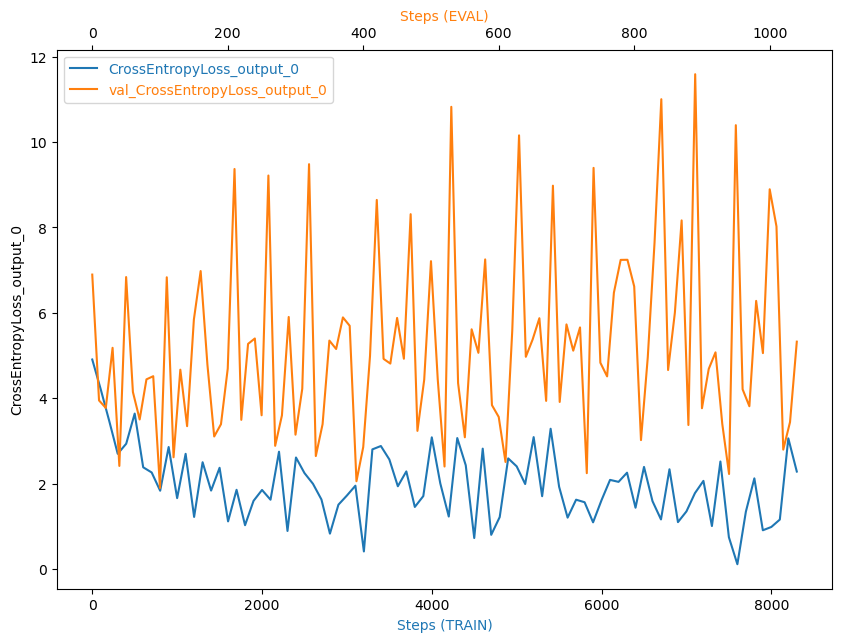

In [79]:
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import host_subplot


def plot_tensor(trial, tensor_name):

    steps_train, vals_train = get_data(trial, tensor_name, mode=ModeKeys.TRAIN)
    print("loaded TRAIN data")
    steps_eval, vals_eval = get_data(trial, tensor_name, mode=ModeKeys.EVAL)
    print("loaded EVAL data")

    fig = plt.figure(figsize=(10, 7))
    host = host_subplot(111)

    par = host.twiny()

    host.set_xlabel("Steps (TRAIN)")
    par.set_xlabel("Steps (EVAL)")
    host.set_ylabel(tensor_name)

    (p1,) = host.plot(steps_train, vals_train, label=tensor_name)
    print("completed TRAIN plot")
    (p2,) = par.plot(steps_eval, vals_eval, label="val_" + tensor_name)
    print("completed EVAL plot")
    leg = plt.legend()

    host.xaxis.get_label().set_color(p1.get_color())
    leg.texts[0].set_color(p1.get_color())

    par.xaxis.get_label().set_color(p2.get_color())
    leg.texts[1].set_color(p2.get_color())

    plt.ylabel(tensor_name)

    plt.show()

plot_tensor(trial, "CrossEntropyLoss_output_0")

**TODO**: Is there some anomalous behaviour in your debugging output? If so, what is the error and how will you fix it?  
**TODO**: If not, suppose there was an error. What would that error look like and how would you have fixed it?

In [80]:
rule_output_path = estimator.output_path + estimator.latest_training_job.job_name + "/rule-output"

In [81]:
! aws s3 ls {rule_output_path} --recursive

2024-07-25 13:19:49     418296 pytorch-training-2024-07-25-12-14-38-943/rule-output/ProfilerReport/profiler-output/profiler-report.html
2024-07-25 13:19:48     274027 pytorch-training-2024-07-25-12-14-38-943/rule-output/ProfilerReport/profiler-output/profiler-report.ipynb
2024-07-25 13:19:43        577 pytorch-training-2024-07-25-12-14-38-943/rule-output/ProfilerReport/profiler-output/profiler-reports/BatchSize.json
2024-07-25 13:19:43      76880 pytorch-training-2024-07-25-12-14-38-943/rule-output/ProfilerReport/profiler-output/profiler-reports/CPUBottleneck.json
2024-07-25 13:19:43       2383 pytorch-training-2024-07-25-12-14-38-943/rule-output/ProfilerReport/profiler-output/profiler-reports/Dataloader.json
2024-07-25 13:19:43        330 pytorch-training-2024-07-25-12-14-38-943/rule-output/ProfilerReport/profiler-output/profiler-reports/GPUMemoryIncrease.json
2024-07-25 13:19:43        604 pytorch-training-2024-07-25-12-14-38-943/rule-output/ProfilerReport/profiler-output/profiler-re

In [82]:
report_output_path = rule_output_path + "/ProfilerReport/profiler-output/profiler-report.html"
! aws s3 cp {report_output_path} ./ 

download: s3://sagemaker-us-east-1-471112614246/pytorch-training-2024-07-25-12-14-38-943/rule-output/ProfilerReport/profiler-output/profiler-report.html to ./profiler-report.html


In [83]:
# TODO: Display the profiler output
import IPython

IPython.display.HTML(filename="profiler-report.html")

## Model Deploying

In [83]:
# TODO: Deploy your model to an endpoint
from sagemaker.model_monitor import DataCaptureConfig
from sagemaker.serializers import IdentitySerializer

predictor = estimator.deploy(initial_instance_count=1,
                             instance_type='ml.m5.xlarge',
                             endpoint_name='pytorch-endpoint', 
                            serializer=IdentitySerializer("image/png"))  # TODO: Add your deployment configuration like instance type and number of instances

INFO:sagemaker:Repacking model artifact (s3://sagemaker-us-east-1-471112614246/pytorch-training-2024-07-28-12-43-42-750/output/model.tar.gz), script artifact (s3://sagemaker-us-east-1-471112614246/pytorch-training-2024-07-28-12-43-42-750/source/sourcedir.tar.gz), and dependencies ([]) into single tar.gz file located at s3://sagemaker-us-east-1-471112614246/pytorch-training-2024-07-28-12-47-56-067/model.tar.gz. This may take some time depending on model size...
INFO:sagemaker:Creating model with name: pytorch-training-2024-07-28-12-47-56-067
INFO:sagemaker:Creating endpoint-config with name pytorch-endpoint
INFO:sagemaker:Creating endpoint with name pytorch-endpoint


------!

In [84]:
# TODO: Run an prediction on the endpoint
import base64
# predictor.serializer = IdentitySerializer("image/png")
with open("./dogImages/test/009.American_water_spaniel/American_water_spaniel_00646.jpg", "rb") as f:
    image = f.read()
    convert = base64.b64encode(image)  # TODO: Your code to load and preprocess image to send to endpoint for prediction

response = predictor.predict(convert)

In [85]:
response

array([[35]])

In [68]:
# TODO: Remember to shutdown/delete your endpoint once your work is done
predictor.delete_endpoint()

INFO:sagemaker:Deleting endpoint configuration with name: pytorch-endpoint
INFO:sagemaker:Deleting endpoint with name: pytorch-endpoint
